<a href="https://colab.research.google.com/github/srini11govind/skills-github-pages/blob/main/milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk


**Q1.  Which emotion is the most common in the given dataset?**

In [3]:
#1. Load the Dataset
# ==========================
df = pd.read_csv("/content/train.csv")

# Let's inspect the data
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (6827, 8)


,id,text,anger,fear,joy,sadness,surprise,emotions
0,0,the dentist that did the work apparently did a...,1,0,0,1,0,['anger' 'sadness']
1,1,i'm gonna absolutely ~~suck~~ be terrible duri...,0,1,0,1,0,['fear' 'sadness']
2,2,"bridge: so leave me drowning calling houston, ...",0,1,0,1,0,['fear' 'sadness']
3,3,after that mess i went to see my now ex-girlfr...,1,1,0,1,0,['anger' 'fear' 'sadness']
4,4,"as he stumbled i ran off, afraid it might some...",0,1,0,0,0,['fear']


In [4]:
cols = ['anger', 'fear', 'joy', 'sadness', 'surprise']
df1=df[['anger', 'fear', 'joy', 'sadness', 'surprise']]

In [5]:
for i in df1.columns:
  print(df[i].value_counts())

anger
0    6019
1     808
Name: count, dtype: int64
fear
1    3860
0    2967
Name: count, dtype: int64
joy
0    5167
1    1660
Name: count, dtype: int64
sadness
0    4656
1    2171
Name: count, dtype: int64
surprise
0    4828
1    1999
Name: count, dtype: int64


**ANS1. Most common emotion is fear 3860**

**Q2. What is the total count of such instances in the training set that have exactly 2 labels?**

In [6]:
print(df1.sum(axis=1))

0       2
1       2
2       2
3       3
4       1
       ..
6822    1
6823    1
6824    2
6825    2
6826    1
Length: 6827, dtype: int64


In [7]:
df1['2count']=df1.sum(axis=1)
x=(df1['2count']==2).sum()
print(x)

2587


/tmp/ipython-input-110739213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['2count']=df1.sum(axis=1)


**Ans2. 2587 (2) emotions for single row**

**Q3. What is the number of rows where 'Joy' and 'Sadness' occur together in the training set?**

In [8]:
joysadness = ((df['joy'] == 1) & (df['sadness'] == 1)).sum()
print(f"'Joy' and 'Sadness' together: {joysadness}")

'Joy' and 'Sadness' together: 96


**Ans3. 'Joy' and 'Sadness' together: 96**

**Q4. What is the percentage of the dataset containing 'Surprise'?**

In [9]:
surprise = df['surprise'].sum()
y=len(df)
SP= (surprise/y)*100
print(f"Percentage containing 'Surprise': {SP:.2f}%")

Percentage containing 'Surprise': 29.28%


**Ans4. Percentage containing 'Surprise': 29.28%**

**Q5.What is the maximum difference in occurrence counts between any two emotion labels?**

In [10]:
label_sums = df[cols].sum().sort_values(ascending=False)
max_diff = label_sums.max() - label_sums.min()
print(f"Maximum difference in occurrence counts: {max_diff}")

Maximum difference in occurrence counts: 3052


**Ans 5. Maximum difference in occurrence counts: 3052**

**Q6. What is the median word length of the texts?**

In [11]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
median_word_length = int(df['text_length'].median())
print(f"Median word length of texts: {median_word_length}")

Median word length of texts: 13


In [12]:
max_word_length = int(df['text_length'].max())
print(f"Max word length of texts: {max_word_length}")

Max word length of texts: 89


In [13]:
min_word_length = int(df['text_length'].min())
print(f"Min word length of texts: {min_word_length}")

Min word length of texts: 1


**Ans6.median word length is** Note: Max word length is 89, min word length is 13                                                  

**Q7. What is the correlation coefficient value between anger and fear?**

In [14]:
corr_ang_fear = df['anger'].corr(df['fear'])
print(f"Correlation coefficient (Anger vs Fear): {corr_ang_fear:.2f}")

Correlation coefficient (Anger vs Fear): 0.08


**Ans7.Correlation coefficient (Anger vs Fear): 0.08**

**Q8.Convert all text to lowercase for normalization. Remove all special characters from the dataset using string.punctuation, and answer the following questions: What is the percentage reduction in total character count after removing punctuation?**

In [15]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [16]:
original_char_count = df['text'].apply(len).sum()
df['clean_text'] = df['text'].apply(clean_text)
clean_char_count = df['clean_text'].apply(len).sum()
char_reduction_pct = ((original_char_count - clean_char_count) / original_char_count) * 100
print(f"Percentage reduction in total character count after removing punctuation: {char_reduction_pct:.2f}%")

Percentage reduction in total character count after removing punctuation: 3.26%


**ANs 8. Percentage reduction in total character count after removing punctuation: 3.26%**

**Q9.What percentage of unique words are common stop words? Hint: Use the nltk module to import stopwords.**

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words('english'))
all_words = " ".join(df['clean_text']).split()
unique_words = set(all_words)
stopword_in_unique = [w for w in unique_words if w in stop_words]
stopword_percentage = (len(stopword_in_unique) / len(unique_words)) * 100
print(f"Percentage of unique words that are stop words: {stopword_percentage:.2f}%")

Percentage of unique words that are stop words: 1.54%


***Ans9.Percentage of unique words that are stop words: 1.54%***

**Q10. What is the 5th most frequent word excluding standard stop words?**

In [19]:
filtered_words = [w for w in all_words if w not in stop_words]
word_freq = Counter(filtered_words)
top_10_words = word_freq.most_common(10)
print("Top 10 frequent words (excluding stopwords):")
for w, c in top_10_words:
    print(f"{w}: {c}")

fifth_most_frequent = top_10_words[4][0]
print(f"5th most frequent word (excluding stopwords): {fifth_most_frequent}")

Top 10 frequent words (excluding stopwords):
head: 539
eyes: 438
like: 394
back: 365
heart: 334
one: 323
face: 293
get: 291
time: 271
still: 271
5th most frequent word (excluding stopwords): heart


**ANs10.5th most frequent word (excluding stopwords): heart**

**DATA VISUALIZATION**

/tmp/ipython-input-3735087442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_sums.index, y=label_sums.values, palette="viridis")


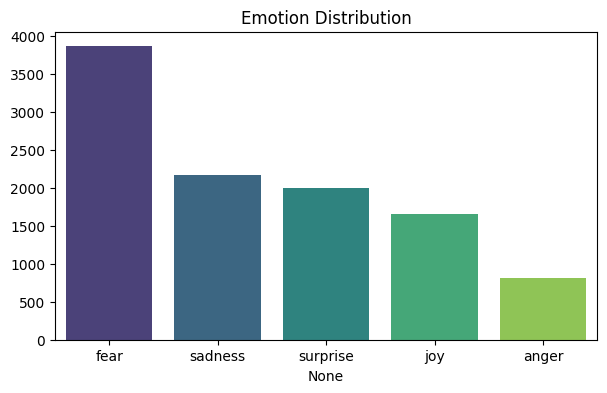

In [20]:
plt.figure(figsize=(7,4))
sns.barplot(x=label_sums.index, y=label_sums.values, palette="viridis")
plt.title("Emotion Distribution")
plt.show()

**TEXT LENGTH**

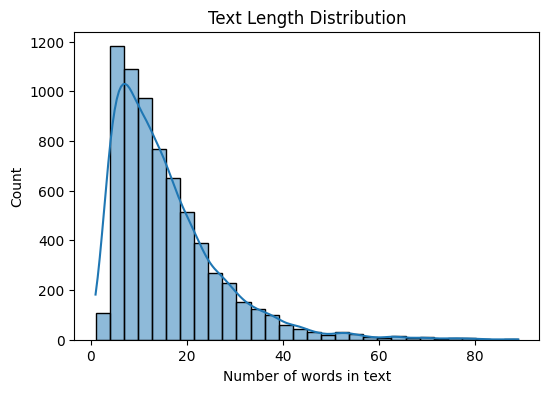

In [21]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of words in text")
plt.show()

In [22]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

**CO-occurrence matrix**

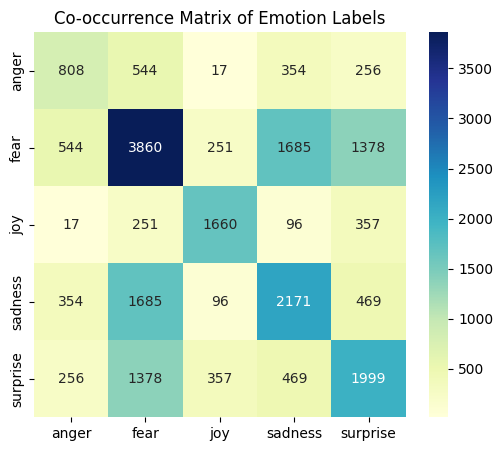

In [24]:
co_matrix = np.dot(df[labels].values.T, df[labels].values)
co_df = pd.DataFrame(co_matrix, index=labels, columns=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(co_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Co-occurrence Matrix of Emotion Labels")
plt.show()

****

**Text Length distribution**

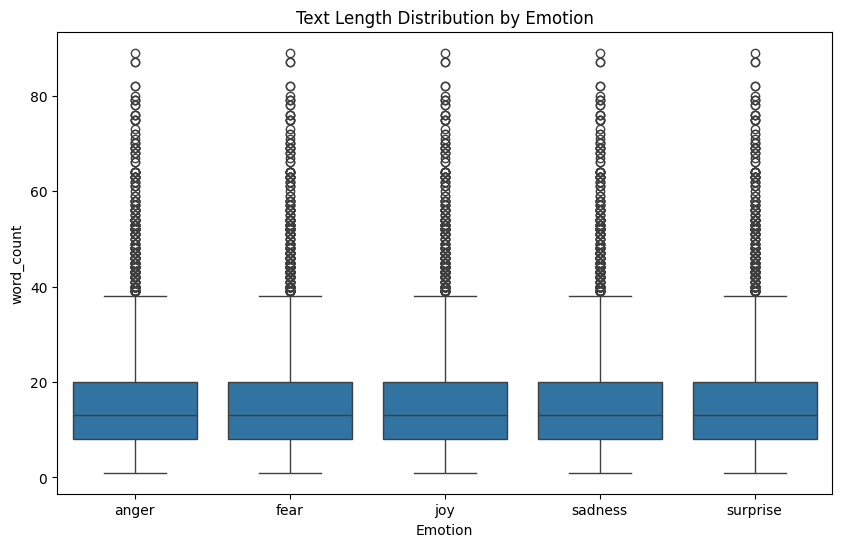

In [25]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.melt(id_vars=['word_count'], value_vars=labels,
            var_name='Emotion', value_name='Present'),
            x='Emotion', y='word_count')
plt.title("Text Length Distribution by Emotion")
plt.show()

In [34]:
df['word_count'].value_counts().head(50)

,count
word_count,
4,619
8,434
7,419
11,351
6,329
12,315
10,306
16,282
15,260


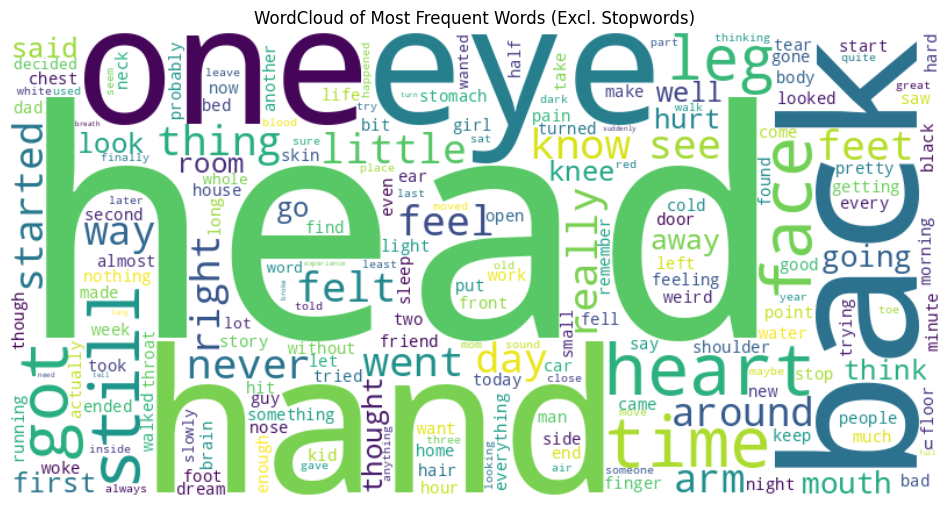

In [30]:
# WordCloud for a more visual analysis
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud of Most Frequent Words (Excl. Stopwords)")
plt.show()